<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Session 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Heart disease data)

The dataset contains information about patients. The aim is to find whether or not a patient has cardiovascular disease based on the several factors from the patient profile. <br> Attribute information: 

**male:** Gender of patient: male(1) or female(0) 

**age:** Age of patient

**education:** Education level of patient: 1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = college

**currentSmoker:** Whether the patient is a smoker now: Yes(1) or No(0)

**cigsPerDay:** Average number of cigarettes smoked by patient per day

**BPMeds:** Whether the patient is on blood pressure medications: Yes(1) or No(0)

**prevalentStroke:** If the patient has a history of heart stroke: Yes(1) or No(0)

**prevalentHyp:** If the patient has a history of hypertension: Yes(1) or No(0)

**diabetes:**  If the patient has a diabetes: Yes(1) or No(0)

**totChol:** Average cholesterol levels in mg/dL

**sysBP:** Average systolic blood pressure of patient

**diaBP:** Average diastolic blood pressure of patient

**BMI:** BMI of patient

**heartRate:** Avergae heartrate of patient

**glucose:** Average blood glucose levels of patient

**CVD:** Does the patient have cardiovascular disease: Yes(1) or No(0)

## Table of Content

1. **[Logistic Regression Model](#logreg)**
2. **[Model Evaluation Metrics](#mod_eval)**
3. **[Performance Evaluation Metrics](#perf_eval)**
4. **[Determining optimal threshold](#opt)**

**Import the required libraries**

In [2]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

# import 'is_string_dtype' to check the string type 
from pandas.api.types import is_string_dtype

# import function to perform feature selection
from sklearn.feature_selection import RFE

In [3]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [10,5]

#### Load the csv file

In [4]:
# load the csv file
df_heart = pd.read_csv("Heart_disease.csv")

# display the first two observations
df_heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4.000000,0,0.000000,0.000000,0,0,0,195.000000,106.000000,70.000000,26.970000,80.000000,77.000000,0
1,0,46,2.000000,0,0.000000,0.000000,0,0,0,250.000000,121.000000,81.000000,28.730000,95.000000,76.000000,0
2,1,48,1.000000,1,20.000000,0.000000,0,0,0,245.000000,127.500000,80.000000,25.340000,75.000000,70.000000,0
3,0,61,3.000000,1,30.000000,0.000000,0,1,0,225.000000,150.000000,95.000000,28.580000,65.000000,103.000000,1
4,0,46,3.000000,1,23.000000,0.000000,0,0,0,285.000000,130.000000,84.000000,23.100000,85.000000,85.000000,0


**Data Preparation**

In [5]:
# check the size of data
df_heart.shape

(4240, 16)

In [6]:
# check data types of variables
df_heart.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
CVD                  int64
dtype: object

In [7]:
# convert the columns that are wrongly specified as numeric to object type 

# convert the column male to object type
df_heart['male'] = df_heart['male'].astype(object)

# convert the column education to object type
df_heart['education'] = df_heart['education'].astype(object)

# convert the column currentSmoker to object type
df_heart['currentSmoker'] = df_heart['currentSmoker'].astype(object)

# convert the column BPMeds to object type
df_heart['BPMeds'] = df_heart['BPMeds'].astype(object)

# convert the column prevalentStroke to object type
df_heart['prevalentStroke'] = df_heart['prevalentStroke'].astype(object)

# convert the column prevalentHyp to object type
df_heart['prevalentHyp'] = df_heart['prevalentHyp'].astype(object)

# convert the column diabetes to object type
df_heart['diabetes'] = df_heart['diabetes'].astype(object)

**Missing value analysis**

In [8]:
# isnull().sum(): calculate the null values in each column for dataset
# sort_values(ascending=False): sort the values in descending order of values
total = df_heart.isnull().sum().sort_values(ascending=False)

# isnull().sum(): calculate the null values in each column for dataset
# isnull().count(): calculate the count values in each column for dataset
# sort_values(ascending=False): sort the values in descending order of values
percent = (df_heart.isnull().sum()/df_heart.isnull().count()).sort_values(ascending=False)

# concat(): append dataframes
# axis=1: append by column
# keys: specify column name
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# display dataframe of missing values
missing_data

,Total,Percent
glucose,388,0.091509
education,105,0.024764
BPMeds,53,0.012500
totChol,50,0.011792
cigsPerDay,29,0.006840
BMI,19,0.004481
heartRate,1,0.000236
CVD,0,0.000000
diaBP,0,0.000000
sysBP,0,0.000000


Except glucose we can drop all the records with null values from other columns.

In [9]:
# dropna(): drop null values 
# subset: provide selected list of columns
df_heart = df_heart.dropna(subset = ['education', 'BPMeds', 'totChol','cigsPerDay','BMI','heartRate'])

In [10]:
# check size of data
df_heart.shape

(3989, 16)

In [11]:
# fillna(): fill null values  with the median value
# value_counts().index[0]: indicates the mode for a categorical variable
df_heart['glucose'] = df_heart['glucose'].fillna(df_heart['glucose'].median())

### Let's begin with some hands-on practice exercises

<a id="logreg"> </a>
## 1. Logistic regression model

## We shall use the heart disease dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are all the classes of target variable 'CVD' fairly represented by records in the considered dataset ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

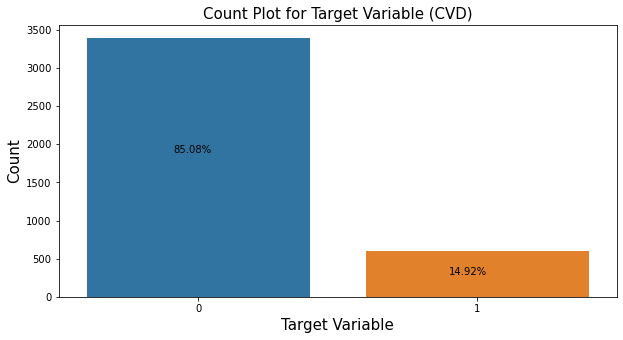

In [12]:
# consider only the target variable
df_target = df_heart['CVD']

# get counts of 0's and 1's in the 'Loan_Status' variable
df_target.value_counts()

# plot the countplot of the variable 'Loan_Status'
sns.countplot(x = df_target)

# use below code to print the percentage values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text to be printed
plt.text(x = -0.09, y = df_target.value_counts()[0] - 1500, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.text(x = 0.90, y = df_target.value_counts()[1] - 300, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Target Variable (CVD)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

The percentage of the patients detected with cardiovascular disease is 14.92% and that of patients not having cardiovascular disease is 85.08%. So we can say all the classes are fairly represented.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Predict whether or not a patient will have cardiovascular disease based on the information about blood pressure of the patient. Columns related to blood pressure are diaBP, sysBP and BPMeds.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
# select the numeric independent variables
df_num = df_heart.iloc[:,[10,11]]

# scale all the numeric independent variables
num_scaled=df_num.apply(lambda rec:rec-rec.mean()/rec.std(),axis=0)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
X = pd.DataFrame(num_scaled, columns = df_num.columns)

# add the categorical variable to train set dataframe
# convert the categorical variable to dummy variable
# get_dummies(): converts the variable to categorical variable
# drop_first=True: indicates n-1 dummy enoding; if set to false indicates one-hot encoding
X['BPMeds'] = pd.get_dummies(df_heart["BPMeds"], drop_first=True)

# set target variable
y = df_heart.CVD



In [26]:
# add a constant column to the dataframe
# while using the 'Logit' method in the Statsmodels library, the method do not consider the intercept by default
# we can add the intercept to the set of independent variables using 'add_constant()'
X = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2)
X_train.dtypes



const     float64
sysBP     float64
diaBP     float64
BPMeds      uint8
dtype: object

In [25]:
# build the model on train data 
# use fit() to fit the logistic regression model
logreg = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.400832
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    CVD   No. Observations:                 3191
Model:                          Logit   Df Residuals:                     3187
Method:                           MLE   Df Model:                            3
Date:                Sat, 05 Jun 2021   Pseudo R-squ.:                 0.05096
Time:                        10:35:36   Log-Likelihood:                -1279.1
converged:                       True   LL-Null:                       -1347.7
Covariance Type:            nonrobust   LLR p-value:                 1.399e-29
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4159      0.328    -13.473      0.000      -5.058      -3.774
sysBP          0.0272      0.

From the output, we see that the systolic BP value significantly affects the occurence of cardiovascular disease.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Predict whether or not a patient has cardiovascular disease using the categorical variables in the dataset. How does a unit change in each feature influence the odds of a patient having a cardiocascular disease?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
# consider all the categorical variables in the data
# select_dtypes: selects the variable having specified datatype
# include: includes the variables with specified datatype
df_cat = df_heart.select_dtypes(include="object")

# convert the categorical variable to dummy variable
# get_dummies(): converts the variable to categorical variable
# drop_first=True: indicates n-1 dummy enoding; if set to false indicates one-hot encoding
X = pd.get_dummies(df_cat, drop_first=True)

# consider the dependent variable
y = df_heart.CVD

In [16]:
# add a constant column to the dataframe
# while using the 'Logit' method in the Statsmodels library, the method do not consider the intercept by default
# we can add the intercept to the set of independent variables using 'add_constant()'
X = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2)

In [17]:
# build the model on train data 
# use fit() to fit the logistic regression model
logreg = sm.Logit(y_train, X_train).fit()

# take the exponential of the coefficient of a variable to calculate the odds
# 'params' returns the coefficients of all the independent variables
# pass the required column name to the parameter, 'columns'
df_odds = pd.DataFrame(np.exp(logreg.params), columns= ['Odds']) 

# print the dataframe
df_odds

Optimization terminated successfully.
         Current function value: 0.398923
         Iterations 6


,Odds
const,0.103328
male_1,1.679930
education_2.0,0.626836
education_3.0,0.796133
education_4.0,0.798434
currentSmoker_1,1.223758
BPMeds_1.0,1.983432
prevalentStroke_1,1.995138
prevalentHyp_1,2.244576
diabetes_1,2.373889


From the above table we can see how unit change in a variable respectively increase the odds of a patient having cardiovascular disease. The odds of constant indicate the odds of having a cardiovascular disease when no information about the patient is known. 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Predit if a patient has cardiovascular disease based on whether or not the patient has history of hypertension. Calculate the odds ratio.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
# add the categorical variable to train set dataframe
# convert the categorical variable to dummy variable
# get_dummies(): converts the variable to categorical variable
# drop_first=True: indicates n-1 dummy enoding; if set to false indicates one-hot encoding
X= pd.get_dummies(df_heart["prevalentHyp"], drop_first=True)

# set target variable
y = df_heart.CVD

# add a constant column to the dataframe
# while using the 'Logit' method in the Statsmodels library, the method do not consider the intercept by default
# we can add the intercept to the set of independent variables using 'add_constant()'
X = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2)

In [19]:
# build the model on train data 
# use fit() to fit the logistic regression model
logreg = sm.Logit(y_train, X_train).fit()

# take the exponential of the coefficient of a variable to calculate the odds
# 'params' returns the coefficients of all the independent variables
# pass the required column name to the parameter, 'columns'
df_odds = pd.DataFrame(np.exp(logreg.params), columns= ['Odds'])

odds_hyp=df_odds.iloc[1,0]
odds_no_hyp=(1/df_odds.iloc[1,0])

# print the dataframe
print("Odds of having heart disease given he has history of hypertension:",odds_hyp)
print("Odds of having heart disease given he does not have history of hypertension:",odds_no_hyp)
print("Odds ratio:",(odds_hyp/odds_no_hyp))

Optimization terminated successfully.
         Current function value: 0.409951
         Iterations 6
Odds of having heart disease given he has history of hypertension: 2.4799880590534085
Odds of having heart disease given he does not have history of hypertension: 0.40322774795201716
Odds ratio: 6.150340773047492


From the odds ratio we can infer that a patient having a history of hypertension has approximately 6 times higher odds of having cardiovascular disease compared to a patient who does not have a history of hypertension.

<a id="mod_eval"> </a>
## 2. Model Evaluation Metrics

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Build a full model to predict if a patient will have a cardiovascular disease. Find the value of Mcfadden's R<sup>2</sup>.
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
# consider the independent variables
# select_dtypes: selects the variable having specified datatype
# include: includes the variables with specified datatype
# drop(): drops specified column(s)/row(s) from the dataframe
# axis: specifies whether to drop labels from index or columns; use 1 for columns and 0 for index
df_numeric = df_heart.select_dtypes(include=np.number).drop(["CVD"],axis=1)

# scale all the numeric independent variables
num_scaled=df_numeric.apply(lambda rec:rec-rec.mean()/rec.std(),axis=0)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
df_num = pd.DataFrame(num_scaled, columns = df_num.columns)

# consider all the categorical variables in the data
# select_dtypes: selects the variable having specified datatype
# include: includes the variables with specified datatype
df_categorical = df_heart.select_dtypes(include="object")

# convert the categorical variable to dummy variable
# get_dummies(): converts the variable to categorical variable
# drop_first=True: indicates n-1 dummy enoding; if set to false indicates one-hot encoding
df_cat = pd.get_dummies(df_categorical, drop_first=True)

# concatenate the scaled numerical and dummy variables
# axis: specifies whether to drop labels from index or columns; use 1 for columns and 0 for index
X = pd.concat([df_num,df_cat],axis=1)

# consider the dependent variable
y = df_heart.CVD

# add a constant column to the dataframe
# while using the 'Logit' method in the Statsmodels library, the method do not consider the intercept by default
# we can add the intercept to the set of independent variables using 'add_constant()'
X = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, random_state = 1, test_size = 0.2)

In [21]:
# build the model on train data 
# use fit() to fit the logistic regression model
logreg_full = sm.Logit(y_train_full, X_train_full).fit()

# let 'y_pred_prob' be the predicted values of y
y_pred_prob_full = logreg_full.predict(X_test_full)

# print the summary of the model
print(logreg_full.summary())

Optimization terminated successfully.
         Current function value: 0.389908
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    CVD   No. Observations:                 3191
Model:                          Logit   Df Residuals:                     3179
Method:                           MLE   Df Model:                           11
Date:                Wed, 16 Dec 2020   Pseudo R-squ.:                 0.07683
Time:                        16:18:51   Log-Likelihood:                -1244.2
converged:                       True   LL-Null:                       -1347.7
Covariance Type:            nonrobust   LLR p-value:                 2.520e-38
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.4332      0.427    -10.391      0.000      -5.269      -3.597
sysBP   

As we can see the value of  pseudo or Mcfadden's R<sup>2</sup> is `0.07683`.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Find the significant variables in the full model when all the variables are considered in prediction of whether or not a patient has cardiovascular disease.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
print(logreg_full.summary())

                           Logit Regression Results                           
Dep. Variable:                    CVD   No. Observations:                 3191
Model:                          Logit   Df Residuals:                     3179
Method:                           MLE   Df Model:                           11
Date:                Wed, 16 Dec 2020   Pseudo R-squ.:                 0.07683
Time:                        16:18:51   Log-Likelihood:                -1244.2
converged:                       True   LL-Null:                       -1347.7
Covariance Type:            nonrobust   LLR p-value:                 2.520e-38
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.4332      0.427    -10.391      0.000      -5.269      -3.597
sysBP                 0.0278      0.004      7.079      0.000       0.020       0.035
diaBP                -0.

For logistic regression the Wald's test is used to identify the variables that significantly affect the target variable. Hence we can see that the following features are significant:<br>[`sysBP`,`diaBP`,`male_1`,`education_2.0`,`currentSmoker_1`,`diabetes_1`]

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. How do the coefficients of each feature form the dataset impact the odds of a patient having a cardiovascular disease?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

To interpret the coefficients of each feature we consider the full model built in question 5

In [23]:
# print the summary of the model
print(logreg_full.summary())

                           Logit Regression Results                           
Dep. Variable:                    CVD   No. Observations:                 3191
Model:                          Logit   Df Residuals:                     3179
Method:                           MLE   Df Model:                           11
Date:                Wed, 16 Dec 2020   Pseudo R-squ.:                 0.07683
Time:                        16:18:51   Log-Likelihood:                -1244.2
converged:                       True   LL-Null:                       -1347.7
Covariance Type:            nonrobust   LLR p-value:                 2.520e-38
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.4332      0.427    -10.391      0.000      -5.269      -3.597
sysBP                 0.0278      0.004      7.079      0.000       0.020       0.035
diaBP                -0.

**Interpretation of coefficients:**

const: The odds of a patient having cardiovascular disease is 1/e<sup>4.4332</sup>, considering all other variables take zero value. 

sysBP: 0.0278, it implies that the odds of a patient having cardiovascular disease increases by a factor of e<sup>0.0278</sup> due to one unit increase in the systolic blood pressure, keeping other variables constant

diaBP: -0.0171, it implies that the odds of a patient having cardiovascular disease decreases by a factor of e<sup>0.0171</sup> due to one unit increase in the diastolic blood pressure, keeping other variables constant

male_1: 0.6110, it implies that the odds of a patient having cardiovascular disease increases by a factor of e<sup>0.6110</sup> if the patient is male compared to if the patient is female, keeping other variables constant

education_2.0: -0.3922, it implies that the odds of a patient having cardiovascular disease decreases by a factor of e<sup>0.3922</sup> if the patient has education level of High school or GED, keeping other variables constant

education_3.0: -0.1439, it implies that the odds of a patient having cardiovascular disease decreases by a factor of e<sup>0.1439</sup> if the patient has education level of vocational High school, keeping other variables constant

education_4.0: -0.0844, it implies that the odds of a patient having cardiovascular disease decreases by a factor of e<sup>0.0844</sup> if the patient has college level education, keeping other variables constant
 
currentSmoker_1:  0.2575, it implies that the odds of a patient having cardiovascular disease increases by a factor of e<sup>0.2575</sup> if the patient is a smoker, keeping other variables constant

BPMeds_1.0: 0.3702, it implies that the odds of a patient having cardiovascular disease increases by a factor of e<sup>0.3702</sup> if the patient has been on blood pressure medications, keeping other variables constant

prevalentStroke_1: 0.7929, it implies that the odds of a patient having cardiovascular disease increases by a factor of e<sup>0.7929</sup> if the patient has a history of heart stroke, keeping other variables constant

prevalentHyp_1: 0.1997, it implies that the odds of a patient having cardiovascular disease decreases by a factor of e<sup>0.1997</sup> if the patient has a history of hypertension, keeping other variables constant

diabetes_1: 0.6942, it implies that the odds of a patient having cardiovascular disease decreases by a factor of e<sup>0.6942</sup> if the patient has diabetes, keeping other variables constant

<a id="perf_eval"> </a>
## 3. Performance evaluation metrics

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>8. For the full model, calculate the accuracy manually using the confusion matrix. Consider 0.5 as the probability threshold.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg_full.predict(X_test_full)

# convert probabilities to 0 and 1 using 'if_else'
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test_full, y_pred)

# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)

# print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.8508771929824561


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9.  Calculate value of kappa for the full model built in question 5. Consider threshold value as 0.18</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg_full.predict(X_test_full)

# convert probabilities to 0 and 1 using 'if_else'
y_pred = [ 0 if x < 0.18 else 1 for x in y_pred_prob]

# compute the kappa value
kappa = cohen_kappa_score(y_test_full, y_pred)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.22275959351699914


The kappa value at threshold 0.22 indicates that there is fair agreement between the raters (actual and predicted values). 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Identify the features from the dataset that are involved in multicollinearity. After that, split the updated data using train_test_split.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

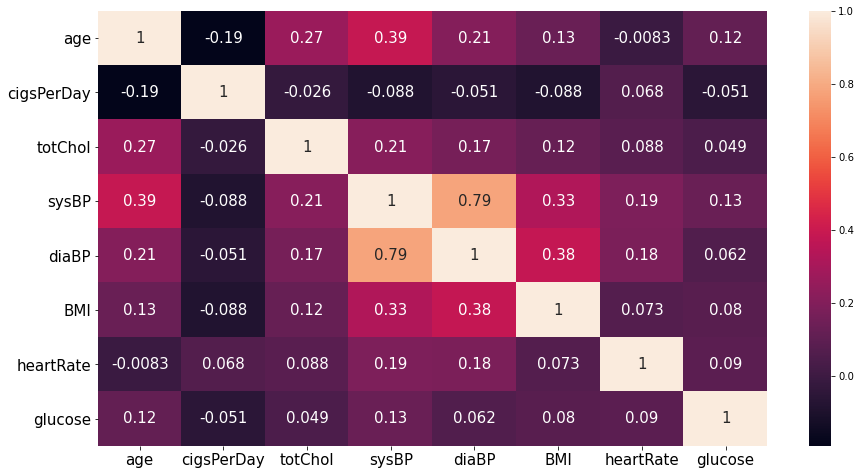

In [26]:
# select_dtypes: selects the variable having specified datatype
# include: includes the variables with specified datatype
# drop(): drops specified column(s)/row(s) from the dataframe
# axis: specifies whether to drop labels from index or columns; use 1 for columns and 0 for index
df_num = df_heart.select_dtypes(include=np.number).drop(['CVD'],axis=1)

# set dimensions for the plot figure
fig_dims = (15,8)
fig, ax = plt.subplots(figsize=fig_dims)

# plot the heat map
# corr: give the correlation matrix
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
sns.heatmap(df_num.corr(), annot = True, annot_kws = {"size": 15})

# rotate the y-axis labels
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(fontsize = 15)

# display the plot
plt.show()

As we can see that the variables 'sysBP'and 'disBP' are highly correlated we can drop one of these variables.

In [27]:
# drop the diastolic blood pressure variable
df_heart = df_heart.drop(['diaBP'], axis=1)

In [28]:
# consider the independent variables
# select_dtypes: selects the variable having specified datatype
# include: includes the variables with specified datatype
# drop(): drops specified column(s)/row(s) from the dataframe
# axis: specifies whether to drop labels from index or columns; use 1 for columns and 0 for index
df_numeric = df_heart.select_dtypes(include=np.number).drop(["CVD"],axis=1)

# scale all the numeric independent variables
num_scaled=df_numeric.apply(lambda rec:rec-rec.mean()/rec.std(),axis=0)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
df_num = pd.DataFrame(num_scaled, columns = df_numeric.columns)

# consider all the categorical variables in the data
# select_dtypes: selects the variable having specified datatype
# include: includes the variables with specified datatype
df_categorical = df_heart.select_dtypes(include="object")

# convert the categorical variable to dummy variable
# get_dummies(): converts the variable to categorical variable
# drop_first=True: indicates n-1 dummy enoding; if set to false indicates one-hot encoding
df_cat = pd.get_dummies(df_categorical, drop_first=True)

# concatenate the scaled numerical and dummy variables
# axis: specifies whether to drop labels from index or columns; use 1 for columns and 0 for index
X = pd.concat([df_num,df_cat],axis=1)

# consider the dependent variable
y = df_heart.CVD

# add a constant column to the dataframe
# while using the 'Logit' method in the Statsmodels library, the method do not consider the intercept by default
# we can add the intercept to the set of independent variables using 'add_constant()'
X = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, random_state = 1, test_size = 0.2)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Use the data obtained from Q10 and identify 5 features that contribute most in the prediction of target variable.<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
# initiate logistic regression model 
logreg = LogisticRegression()

# build the RFE model
# pass the logistic regression model to 'estimator'
# pass number of required features to 'n_features_to_select'
# if we do not pass the number of features, RFE considers half of the features
rfe_model = RFE(estimator = logreg, n_features_to_select = 5)

# fit the RFE model on the train dataset using fit()
rfe_model = rfe_model.fit(X_train_full, y_train_full)

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train_full.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['male_1', 'BPMeds_1.0', 'prevalentStroke_1', 'prevalentHyp_1',
       'diabetes_1'],
      dtype='object')


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Build a model using the features obtained in question 11. For the model find: 
                        <ol>                       
                         <li>Accuracy</li>
                        <li>F<sub>1</sub> score</li>
                        </ol>
                        </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [30]:
# convert the categorical variable to dummy variable
# get_dummies(): converts the variable to categorical variab# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
# consider the variables obtained from RFE method and the intercept term
logreg_rfe = sm.Logit(y_train_full, X_train_full[['male_1', 'BPMeds_1.0', 'prevalentStroke_1', 'prevalentHyp_1','diabetes_1']]).fit()

X_test_new=X_test_full[['male_1', 'BPMeds_1.0', 'prevalentStroke_1', 'prevalentHyp_1','diabetes_1']]

# let 'y_pred_prob' be the predicted values of y
y_pred_prob_rfe = logreg_rfe.predict(X_test_new)

# convert probabilities to 0 and 1 using 'if_else'
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob_rfe]

# pass the actual and predicted target values to the accuracy_score()
print("Accuracy:",accuracy_score(y_test_full, y_pred))

# pass the actual and predicted target values to the f1_score()
print("F1 score:",f1_score(y_test_full, y_pred))


Optimization terminated successfully.
         Current function value: 0.588832
         Iterations 5
Accuracy: 0.525062656641604
F1 score: 0.11241217798594846


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Compare the full model in question 5 and the model built in question 12 using their ROC curves. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

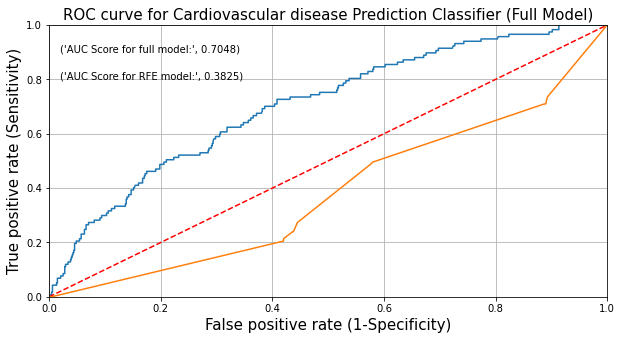

In [31]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test_full, y_pred_prob_full)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Cardiovascular disease Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score for full model:',round(metrics.roc_auc_score(y_test_full, y_pred_prob_full),4)))

# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr1, tpr1, thresholds1 = roc_curve(y_test_full, y_pred_prob_rfe)

# plot the ROC curve
plt.plot(fpr1, tpr1)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.8, s = ('AUC Score for RFE model:',round(metrics.roc_auc_score(y_test_full, y_pred_prob_rfe),4)))
                               
# plot the grid
plt.grid(True)

From the above figure we can see the area under curve is greater for the full model. Hence we can say that full model is better than the model built using 5 significant features.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Build a logistic regression model using information about heart rate of the patients. Compute the AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:
# select the numeric independent variables
df_num = df_heart.iloc[:,[13]]

# scale all the numeric independent variables
num_scaled=df_num.apply(lambda rec:rec-rec.mean()/rec.std(),axis=0)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
X = pd.DataFrame(num_scaled, columns = df_num.columns)

# set target variable
y = df_heart.CVD

In [33]:
# add a constant column to the dataframe
# while using the 'Logit' method in the Statsmodels library, the method do not consider the intercept by default
# we can add the intercept to the set of independent variables using 'add_constant()'
X = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_rate, X_test_rate, y_train_rate, y_test_rate = train_test_split(X, y, random_state = 1, test_size = 0.2)

In [34]:
# build the model on train data 
# use fit() to fit the logistic regression model
logreg_heart = sm.Logit(y_train_rate, X_train_rate).fit()

# let 'y_pred_prob_rfe' be the predicted values of y
y_pred_prob = logreg_heart.predict(X_test_rate)

# print AUC score
print('AUC Score:',round(metrics.roc_auc_score(y_test_rate, y_pred_prob),4))


Optimization terminated successfully.
         Current function value: 0.417653
         Iterations 6
AUC Score: 0.5541


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Calculate the cross entropy for the model built in question 14.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Binary cross entropy also called log loss. Lower the value of cross entropy better is the model.

In [35]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

# pass the actual and predicted values to log_loss()
print("Log loss:",log_loss(y_test_rate,y_pred))

Log loss: 5.020674262919347


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Compare the model built in question 14 to the full model built in question 5.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Here we will use deviance of the two models for comparing them.

In [36]:
# For model in question 14 deviance is given by
deviance_heart=-2*logreg_heart.llf

# For model in question 5 deviance is given by
deviance_full=-2*logreg_full.llf

print("Deviance for model in 14:",deviance_heart)
print("Deviance for model in Q5(Full model):",deviance_full)

Deviance for model in 14: 2665.4621600921905
Deviance for model in Q5(Full model): 2488.3935502006943


As we can see the full model has a lower deviance and hence is a better model.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. What is the cross entropy for the full model? Use the full model in Q5.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [37]:
# use the full model in Q5
# convert probabilities to 0 and 1 using 'if_else'
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob_full]

# pass the actual and predicted values to log_loss()
print("Log loss:",log_loss(y_test,y_pred))

Log loss: 5.150522292965741


As we can see the cross entropy has incresed after including more variables in the model compared to the model considered in question 15. So in our problem as more variables are added the predictions move away the actual labels.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Predict whether a patient has cardiovascular disease based on smoking habits of the patient. For the model find the following:<br> <ol type = "a">
                        <li> Precision </li>
                        <li> Recall</li>   
                        <li> F<sub>1</sub> score </li>
                        </ol>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [38]:
# consider the numeric independent variable
df_num = df_heart.cigsPerDay

# scale all the numeric independent variables
num_scaled=df_numeric.apply(lambda rec:rec-rec.mean()/rec.std(),axis=0)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
df_num = pd.DataFrame(num_scaled, columns = ['cigsPerDay'] )

# convert the categorical variable to dummy variable
# get_dummies(): converts the variable to categorical variable
# drop_first=True: indicates n-1 dummy enoding; if set to false indicate one-hot encoding
df_cat = pd.get_dummies(df_heart.currentSmoker, drop_first=True)

# concatenate the scaled numerical and dummy variables
# axis: specifies whether to drop labels from index or columns; use 1 for columns and 0 for index
X = pd.concat([df_num,df_cat],axis=1)

# consider the dependent variable
y = df_heart.CVD

# add a constant column to the dataframe
# while using the 'Logit' method in the Statsmodels library, the method do not consider the intercept by default
# we can add the intercept to the set of independent variables using 'add_constant()'
X = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_smoke, X_test_smoke, y_train_smoke, y_test_smoke = train_test_split(X, y, random_state = 1, test_size = 0.2)

# build the model on train data 
# use fit() to fit the logistic regression model
logreg = sm.Logit(y_train_smoke, X_train_smoke).fit()

# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg.predict(X_test_smoke)

# convert probabilities to 0 and 1 using 'if_else'
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

# print classification report for the predictions
print(classification_report(y_test_smoke, y_pred))

Optimization terminated successfully.
         Current function value: 0.420406
         Iterations 6
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       681
           1       0.00      0.00      0.00       117

    accuracy                           0.85       798
   macro avg       0.43      0.50      0.46       798
weighted avg       0.73      0.85      0.79       798



<a id="opt"> </a>
## 4. Determining optimal threshold

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Obtain the optimal value threshold for the full model using the Youden's index.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [39]:
# build the model on train data 
# use fit() to fit the logistic regression model
logreg_full = sm.Logit(y_train_full, X_train_full).fit()

# let 'y_pred_prob' be the predicted values of y
y_pred_prob_full = logreg_full.predict(X_test_full)

# print the summary of the model
print(logreg_full.summary())

Optimization terminated successfully.
         Current function value: 0.374550
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    CVD   No. Observations:                 3191
Model:                          Logit   Df Residuals:                     3174
Method:                           MLE   Df Model:                           16
Date:                Wed, 16 Dec 2020   Pseudo R-squ.:                  0.1132
Time:                        16:18:52   Log-Likelihood:                -1195.2
converged:                       True   LL-Null:                       -1347.7
Covariance Type:            nonrobust   LLR p-value:                 2.242e-55
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -7.7098      0.662    -11.647      0.000      -9.007      -6.412
age     

In [40]:
# use the full model in Q5
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg_full.predict(X_test_full)

# obtain the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test_full, y_pred_prob)

# create a dataframe to store the values for false positive rate, true positive rate and threshold
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

# sort the dataframe based on the values of difference 
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.666667,0.256975,0.170194,0.409692
1,0.658120,0.249633,0.173637,0.408487
2,0.683761,0.277533,0.164190,0.406228
3,0.717949,0.312775,0.152991,0.405173
4,0.675214,0.270191,0.166715,0.405023


The above output shows that the maximum difference in TPR and FPR is corresponding to the cut-off value 0.170194. Thus, we can consider this value as the optimal value for cut-off.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Consider the costs of false negatives and false positives as 3 and 1.3 respectively to obtain the optimal cut-off probability for which the total cost will be minimum.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [41]:
# define a function to calculate the total_cost for a cut-off value
# pass the actual values of y, predicted probabilities of y, cost for FN and FP
def calculate_total_cost(actual_value, predicted_value, cost_FN, cost_FP):

    # pass the actual and predicted values to calculate the confusion matrix
    cm = confusion_matrix(actual_value, predicted_value)           
    
    # create an array of the confusion matrix
    cm_array = np.array(cm)
    
    # return the total_cost
    return cm_array[1,0] * cost_FN + cm_array[0,1] * cost_FP

# create an empty dataframe to store the cost for different probability cut-offs
df_total_cost = pd.DataFrame(columns = ['cut-off', 'total_cost'])

# initialize i to '0' corresponding to the 1st row in the dataframe
i = 0

# use for loop to calculate 'total_cost' for each cut-off probability value
# call the function 'calculate_total_cost' to calculate the cost
# pass the actual y-values
# calculate the predicted y-values from 'y_pred_prob' for the cut-off probability value
# assign the costs 2 and 0.4 to False Negatives and False Positives respectively
# add the obtained 'cut_off' and 'total_cost' at the ith index of the dataframe
for cut_off in range(10, 50):
    total_cost = calculate_total_cost(y_test_full,  y_pred_prob.map(lambda x: 1 if x > (cut_off/100) else 0), 3, 1.3) 
    df_total_cost.loc[i] = [(cut_off/100), total_cost] 
    
    # increment the value of 'i' for each row index in the dataframe 'df_total_cost'
    i += 1
    
# sort the dataframe based on the 'total_cost' in the ascending order
# print the first five rows in the dataframe
df_total_cost.sort_values('total_cost', ascending = True).head()

,cut-off,total_cost
14,0.240000,311.600000
13,0.230000,314.700000
15,0.250000,316.600000
17,0.270000,317.200000
16,0.260000,318.600000


From the above output we can see that, for the cut-off probability 0.24 the total cost is minimum.